# Numerical Ordinary Differential Equations and Applications
## Computer Assignment 1: Puppy Love

### Total marks available: 20

D. J. Higham 
School of Mathematics, University of Edinburgh, 2022

In this first computer assignment we will investigate curves of pursuit with the Euler method. This is a template Jupyter notebook that (i) gets you started and (ii) sets the **five tasks** that make up the assignment.  

In order to complete the assigment, you must perform the five tasks by editing and/or adding further content to **this notebook**. 

Any figure that you produce should have labeled axes, a title, and where appropriate, a legend to distinguish between plots. 

To submit your completed work
  (a) create a pdf version of the notebook when all cells have been run (on a Mac/Safari system this may be done via "File", "Print Preview" and "Export as PDF"),
  (b) submit **both the .ipynb and .pdf versions** electronically on **Gradescope**.
Hence, you are asked to submit two files: a Jupyter notebook and the corresponding pdf version. If there is any inconsistency between the two files, we will regard the .ipynb version as your definitive submission. *Make sure that your name is clearly indicated at the top of notebook*.

The deadline is **midday on Friday 18th February** and, as for all continuous assessment in this course, standard University of Edinburgh penalties apply for late submission without an authorised extension. 

First we will import some modules.

In [4]:
# Import the required modules
import numpy as np                # scientific library
import matplotlib.pyplot as plt   # for creating plots

### Puppy sees kitten 

*Curves of pursuit* arise in many contexts where there is a moving target. Suppose a puppy is playfully chasing a kitten. Let's assume that the kitten follows a predefined path $(r(t),s(t))$ in the plane in an attempt to evade the puppy. Assume that (a) the puppy runs at a speed that is a constant factor $k$ times the speed of the kitten and (b) the puppy chases in such a way that at all times its tangent points at the kitten. It is then possible to show that the path $(x(t),y(t))$ of the puppy satisfies a system of two ODEs 
$$  
x'(t) = R(t) \left( r(t) - x(t) \right),
$$
$$
y'(t) = R(t) \left( s(t) - y(t) \right),
$$
where
$$
 R(t) = \frac{ k \sqrt{ r'(t) + s'(t) )^2} }{ \sqrt{ (r(t) - x(t))^2  + (s(t) - y(t))^2} }.
$$

Suppose that the kitten follows the outward spiral
$$
 r(t) = \sqrt{1 + t} \cos(t),
$$
$$
 s(t) = \sqrt{1 + t} \sin(t),
$$
 and suppose that initially, at time $t = 0$, the puppy is located at $(2,1)$.
 
In the code below we apply the Euler method to this ODE system in the case where $k = 0.75$. We simulate over $ 0 \le t \le T$ where $T = 10$, with a stepsize of $h = T/1000 = 0.01$. We have tried to make the code as simple as possible to follow. Note that we have used a while loop, rather than a for loop. Also, we update the numerical solution from one timepoint to the next by appending to an array. This structure is natural for the subsequent tasks.  
 

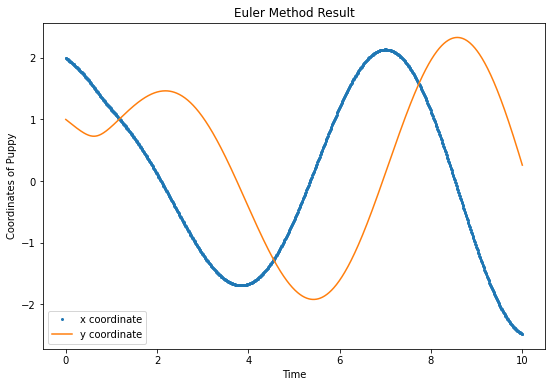

In [5]:
xzero = 2.    # initial x value of puppy
yzero = 1.    # initial y value of puppy
T = 10.       # final value of t
M = 1000      # number of steps 
h = T/M       # stepsize

k = 0.75
t = 0.

x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while n < M:              # the while loop will be useful for Tasks 3 and 4
    ##### Evaluate RHS of ODE system #####
    r = np.sqrt(1+t)*np.cos(t)  # current x coord of kitten
    s = np.sqrt(1+t)*np.sin(t)  # current y coord of kitten
    
    rprime = (0.5/np.sqrt(1+t))*( np.cos(t) - 2*(1+t)*np.sin(t) )  # time deriv of r
    sprime = (0.5/np.sqrt(1+t))*( np.sin(t) + 2*(1+t)*np.cos(t) )  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])
    yprime = R*(s-y[n])
    #####################################
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
                 
    # Update variables
    n += 1
    t += h
                 
# plot the solution
tvals = np.linspace(0,T,M+1)  # t values along the path

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(tvals, x,'o', markersize=2, label = 'x coordinate')
plt.plot(tvals, y,'-', markersize=4, label = 'y coordinate')
plt.xlabel('Time')
plt.ylabel(r'Coordinates of Puppy')
plt.title('Euler Method Result')
plt.legend()
plt.show()

# Task 1    
###   [2 marks]

To get a better feel for the behaviour of the puppy, produce a *phase plane* picture; that is, plot $x(t)$ on the x-axis against $y(t)$ on the y-axis. Superimpose the path taken by the kitten on the same picture. Make the figure as clear as possible, with different colours/linetypes for the two curves and legends that label them.


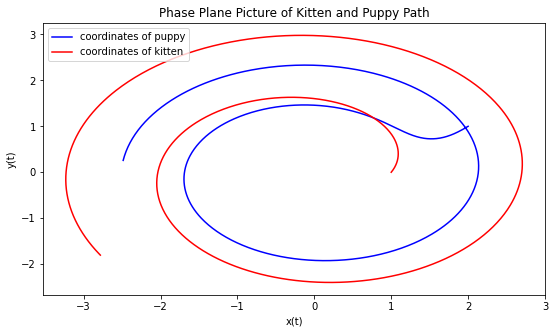

In [6]:
def r(t):
    return np.sqrt(1+t)*np.cos(t)

def s(t):
    return np.sqrt(1+t)*np.sin(t)

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
plt.plot(x,y,'b-', label='coordinates of puppy' )
plt.plot(r(tvals), s(tvals),'r-', label= 'coordinates of kitten')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Phase Plane Picture of Kitten and Puppy Path')
plt.legend(loc='upper left')
plt.show()

# Task 2
###   [5 marks]

We will now study the error in the Euler approximation to $(x(10), y(10))$ as a function of the stepsize.
By copying and editing the code above, conduct an experiment that studies the Euclidean norm of this error for stepsizes $h=0.05$, $h=0.01$, $h = 0.005$ and $h = 0.001$. You do not know the exact solution, so you may use the numerical solution with $h = 0.0001$ instead of the exact solution when computing the error. Produce either a table or a figure to show how the norm of the error behaves in terms of $h$. In this case, does Euler's method appear to converge with order one?

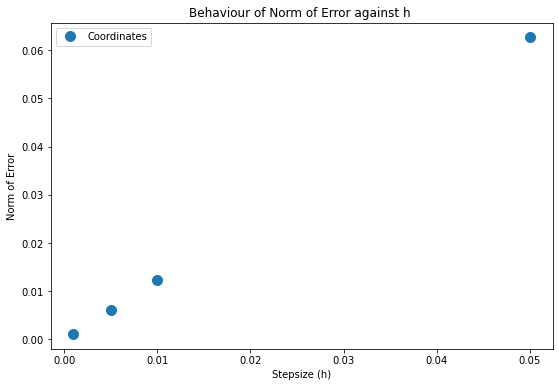

In [14]:
xzero = 2.    # initial x value of puppy
yzero = 1.    # initial y value of puppy
T = 10       # final value of t
M = [200,1000, 2000, 10000, 100000]  #number of steps for (x(10), y(10)) where 
#value of 10 is divided by stepsizes provided h=0.05, 0.01, 0.005 and 0.001 respectively.
h = [T/m for m in M]      #stepsize given by T/M and provided by Task 2
k = 0.75 #constant for how quickly puppy runs to the kitten
final_value=[] #different name /change Anabel
err=[] #different name/change Anabel 

for i in range(5): #range according to number of stepsizes (5)
    t = 0.
    x = [xzero] #initial position vector of the puppy 
    y = [yzero] #initial position vector of the puppy 
    n = 0  # number of steps taken so far

    while n < M[i]:              
    ##### Evaluate RHS of ODE system #####
        r = np.sqrt(1+t)*np.cos(t)  # current x coord of kitten
        s = np.sqrt(1+t)*np.sin(t)  # current y coord of kitten
    
        rprime = (0.5/np.sqrt(1+t))*( np.cos(t) - 2*(1+t)*np.sin(t) )  # time deriv of r
        sprime = (0.5/np.sqrt(1+t))*( np.sin(t) + 2*(1+t)*np.cos(t) )  # time deriv of s
    
        numerator = k*np.sqrt(rprime**2 + sprime**2)
        denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
        R = numerator/denom
        xprime = R*(r-x[n])
        yprime = R*(s-y[n])
        #####################################
    
        ##### Take one step of Euler #######
        x.append(x[n] + h[i]*xprime)
        y.append(y[n] + h[i]*yprime)
                 
        # Update variables
        n += 1
        t += h[i]
    final_value.append([x[-1], y[-1]])
        
for i in range(4): #iteration
    error = np.sqrt((final_value[i][0] - final_value[-1][0])**2+(final_value[i][1] - final_value[-1][1])**2)
    err.append(error) #formula for finding norm of the error (approximated-exact solution)

# """"
# Otherwise use err.append(np.linalg.norm(np.array(i))-np.array(final_value[-1])))
# """""
  # t values along the path
#plot the solution
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(h[0:4], err,'o', markersize=10, label= 'Coordinates')
plt.xlabel('Stepsize (h)')
plt.ylabel("Norm of Error")
plt.title('Behaviour of Norm of Error against h ')
plt.legend()
plt.show()

Comment on the observed convergence behaviour here.

As relationship between stepsize and behaviour of norm of error is linear, this shows that the smaller the stepsize h, the smaller the error. 

# Task 3
###   [5 marks]

The ODE system breaks down if $x(t) = r(t)$ and $y(t) = s(t)$. This makes sense---if the puppy and kitten are at the same point then the puppy can no longer move towards the kitten. In the case where $k > 1$ we would expect the puppy to catch up with the kitten at some finite time. Computationally, we can simulate the system until the puppy gets *sufficiently close* to the kitten. 

We will let $t^\star$ denote the first time that the Euclidean distance between the puppy and kitten reaches ${10}^{-4}$. Using the value $k = 1.5$ and with stepsize $h = 0.01$ (and using the same path for the kitten), compute an estimate for $t^\star$ and produce a new phase-plane figure that shows the paths of the puppy and kitten.

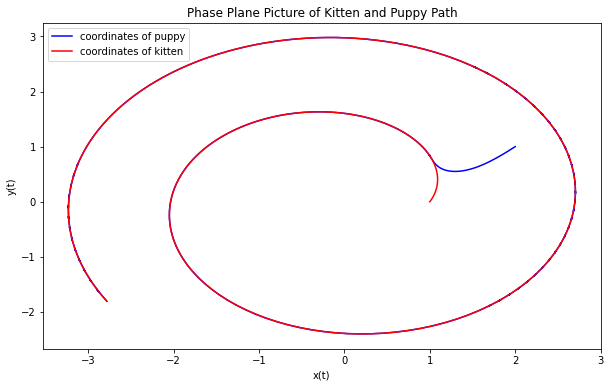

t* estimation= 7.24


In [16]:
xzero = 2.    # initial x value of puppy
yzero = 1.    # initial y value of puppy
T = 10.       # final value of t
M = 1000      # number of steps 
h = T/M       # stepsize
k = 1.5
t = 0

x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while n < M:              # the while loop will be useful for Tasks 3 and 4
    ##### Evaluate RHS of ODE system #####
    r = np.sqrt(1+t)*np.cos(t)  # current x coord of kitten
    s = np.sqrt(1+t)*np.sin(t)  # current y coord of kitten
    
    rprime = (0.5/np.sqrt(1+t))*( np.cos(t) - 2*(1+t)*np.sin(t) )  # time deriv of r
    sprime = (0.5/np.sqrt(1+t))*( np.sin(t) + 2*(1+t)*np.cos(t) )  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])
    yprime = R*(s-y[n])
    #####################################
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
                 
    # Update variables
    n += 1
    t += h
                 
# plot the solution
tvals = np.linspace(0,T,M+1)  # t values along the path

def r(t):
    return np.sqrt(1+t)*np.cos(t)

def s(t):
    return np.sqrt(1+t)*np.sin(t)

for i in range(len(tvals)):
    #finding the intersection of puppy and kitten
    puppy=np.array((x[i], y[i])) #position of puppy in a numpy array 
    kitten=np.array((r(tvals[i]), s(tvals[i]))) #position of kitten in a numpy array
    distance_pup_kit=np.sqrt((puppy[0]-kitten[0])**2+(puppy[1]-kitten[1])**2) #distance between puppy and kitten
    if distance_pup_kit < 1e-4:
        ts = tvals[i]
       
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.plot(x,y,'b-', label='coordinates of puppy' )
plt.plot(r(tvals), s(tvals),'r-', label='coordinates of kitten')
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Phase Plane Picture of Kitten and Puppy Path')
plt.legend(loc='upper left')
plt.show()
print('t* estimation=',ts)

# Task 4
###   [5 marks]

Check the value of $t^\star$ that you computed in Task 3 by repeating the computation for smaller values of the stepsize. Give an approximation to $t^\star$ that you are confident is accurate to three significant figures.

Hint: you could use the *input* command to allow the user to specify the variable h, and then report the $t^\star$ approximations that arise for different choices. More experienced Python users may wish to create a function that takes a value of $h$ and returns a value of $t^\star$.


Input new stepsize(h):0.00001


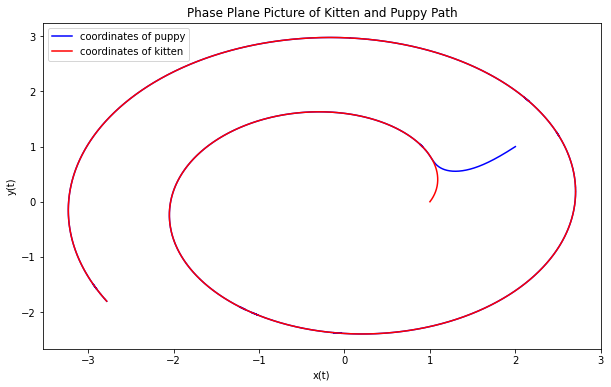

tstar estimation= 0.6993406993406993


In [18]:
xzero = 2.    # initial x value of puppy
yzero = 1.    # initial y value of puppy
T = 10.       # final value of t
     # number of steps 
h=float(input("Input new stepsize(h):")) 
M = T/h# stepsize
k = 1.5
t = 0

x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while n < M:              # the while loop will be useful for Tasks 3 and 4
    ##### Evaluate RHS of ODE system #####
    r = np.sqrt(1+t)*np.cos(t)  # current x coord of kitten
    s = np.sqrt(1+t)*np.sin(t)  # current y coord of kitten
    
    rprime = (0.5/np.sqrt(1+t))*( np.cos(t) - 2*(1+t)*np.sin(t) )  # time deriv of r
    sprime = (0.5/np.sqrt(1+t))*( np.sin(t) + 2*(1+t)*np.cos(t) )  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])
    yprime = R*(s-y[n])
    #####################################
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
                 
    # Update variables
    n += 1
    t += h
                 
# plot the solution
tvals = np.linspace(0,T,int(M+1))  # t values along the path

def r(t):
    return np.sqrt(1+t)*np.cos(t)

def s(t):
    return np.sqrt(1+t)*np.sin(t)

for i in range(len(tvals)):
    #finding the intersection of puppy and kitten
    ts=0
    puppy=np.array((x[i], y[i])) #position of puppy
    kitten=np.array((r(tvals[i]), s(tvals[i])))
    distance_pup_kit=np.sqrt((puppy[0]-kitten[0])**2+(puppy[1]-kitten[1])**2)
    if distance_pup_kit < 1e-4:
        ts = tvals[i]
        break
       
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.plot(x,y,'b-', label='coordinates of puppy')
plt.plot(r(tvals), s(tvals),'r-', label='coordinates of kitten' )
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Phase Plane Picture of Kitten and Puppy Path')
plt.legend(loc='upper left')
plt.show()
print('tstar estimation=' , ts)

State and justify your $t^\star$ value here.

t* estimation value is 0.6993 (4 s.f.) for a stepsize of 0.00001. For smaller stepsizes, the more accurate the results will be.

# Task 5
###   [3 marks]
Make up your own pair of functions $r(t)$ and $s(t)$ and choose values for $k$ and $T$. Plot the resulting phase diagram. Anything that is correctly implemented and looks different to the example above will be fine.

$k=0.75$; $T=5$; $r(t)=(1+t)\cos(t)\sin(t)$; $s(t)=(1+t)\sin(t)^2$

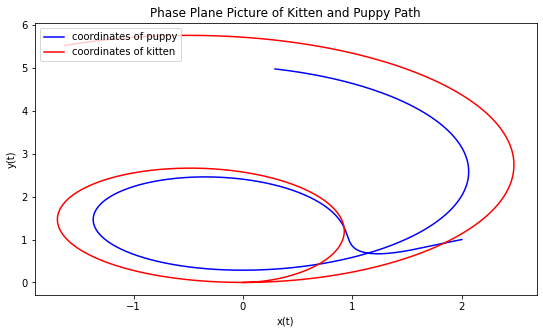

In [21]:
xzero = 2.    # initial x value of puppy
yzero = 1.    # initial y value of puppy
T = 5       # final value of t
M = 1000      # number of steps 
h = T/M       # stepsize

k = 0.75
t = 0.

x = [xzero]
y = [yzero]

n = 0  # number of steps taken so far

while n < M:              # the while loop will be useful for Tasks 3 and 4
    ##### Evaluate RHS of ODE system #####
    r = (1+t)*np.cos(t)*np.sin(t)  # current x coord of kitten
    s = (1+t)*(np.sin(t))**2 #current y coord of kitten
    
    rprime = -(t+1)*(np.sin(t))**2+np.cos(t)*np.sin(t)+(t+1)*(np.cos(t))**2  # time deriv of r
    sprime = (np.sin(t))**2+(2*t+2)*np.sin(t)*np.cos(t)  # time deriv of s
    
    numerator = k*np.sqrt(rprime**2 + sprime**2)
    denom = np.sqrt((r - x[n])**2 + (s - y[n])**2)
    R = numerator/denom
    xprime = R*(r-x[n])
    yprime = R*(s-y[n])
    #####################################
    
    ##### Take one step of Euler #######
    x.append(x[n] + h*xprime)
    y.append(y[n] + h*yprime)
                 
    # Update variables
    n += 1
    t += h
                 
# plot the solution
tvals = np.linspace(0,T,M+1)  # t values along the path

def r(t):
    return (1+t)*np.cos(t)*np.sin(t)

def s(t):
    return (1+t)*(np.sin(t))**2

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
plt.plot(x,y,'b-', label='coordinates of puppy')
plt.plot(r(tvals), s(tvals),'r-', label='coordinates of kitten' )
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Phase Plane Picture of Kitten and Puppy Path')
plt.legend(loc='upper left')
plt.show()